# Jaarlijkse evolutie in België

### Conclusie
In deze grafieken zien we volgende zaken
- In de jaren 70 en 80 zijn er amper waarnemingen. Pas vanaf 2009 begint het aantal waarnemingen significant toe te nemen. </br>De periode voor 2009 beschouwen we niet betrouwbaar en eerder indicatief in het aantal waarnemingen en het aandeel in de waarnemingen.
- Het aantal waarnemingen neemt jaar na jaar toe. Vanaf 2004 worden burgerwaarnemingen meegenomen in de resultaten van obsidentify. Vanaf 2009 zien we de waarnemingen echt significant stijgen. In het aantal waarnemingen zien we ook een piek in 2020 en 2021, dit ligt vermoedelijk aan de invloed van de coronaperiode.
- Om het effectieve verloop in de tijd van de halsbandparkiet en de boomklever te evalueren, werken we met het aandeel van deze stoort in de jaarlijkse waarnemingen (pro million)
- Er is (zelfs na 2009) over de jaren nog veel fluctuatie in waarnemingen en het aandeel halsbandparkieten en boomklevers. Dit ligt vermoedelijk eerder aan de betrouwbaarheid van de data dan aan het effectieve voorkomen van de vogels. Mogelijke zaken aan de basis van deze schommelingen.
    - Projecten: De data in de databank van waarnemingen.be komt van burgerwaarnemingen, maar ook uit andere bronnen, bv. projectwerk. Indien er projecten gefocussed waren op welbepaalde soorten, kunnen hun waarnemingen ook toenemen.
    - Media: Aandacht in de media betreffende een vogelsoort, kan ook de aandacht van de waarnemers op deze soort aanwakkeren, waardoor deze meer gespot en gelogd worden.
- De algemene tendens is dat zowel de halsbandparkiet als de boomklever het goed doen. Hun aandeel in de waarnemingen stijgt met de tijd. </br> Verrassend is dat het aandeel van de boomklever ook enorm aan het toenemen is. Dit had ik niet verwacht van een inheemse vogel. Een zoektocht in de literatuur bevestigt dit
- Het aandeel van beide vogels is nog aan het stijgen, al merken we dat de stijging jaarlijks kleiner wordt. De boomklever lijkt naar een stabilisatie te gaan, terwijl de halsbandparkiet nog iets meer aan het groeien is.


> De boomklever heeft Vlaanderen helemaal veroverd. In de jaren 1960 kon je het aantal broedkoppels per provincie nog op twee handen tellen. Maar door een natuurvriendelijker bosbeheer met respect voor het nut van stervend en dood hout, konden veel bosvogels hun bestand opkrikken, inbegrepen de spechten die boomklevers van broedholen voorzien. In de jaren 1980 steeg het Vlaamse boomkleverbroedbestand tot een drieduizendtal koppels, tegenwoordig zijn het er misschien wel meer dan zevenduizend. </br> _zie resources/naslagwerk: 2024-03-01_knack_Dirk Draulans' Beestenboel\_ hoe de boomklever profiteert van het succes van de specht.pdf_

Als algemene conclusie kunnen we stellen dat zowel de boomklever als de halsbandparkiet het goed doen in België en nog steeds in opmars zijn. </br>We hebben voor meer dan 50 jaar data beschikbaar, maar de bulk van de observaties bevindt zich in de laatste 10 jaar.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_yearly = pd.read_parquet(f'../3_transformation/gold/yearly_observations.parquet', engine="pyarrow")
df_yearly.sort_index(ascending=False).head(5)

,allbirds_observation_count,observation_count_hp,observers_count_hp,observations_pym_hp,observations_pym_5yr_avg_hp,observations_growth_5yr_%_hp,observation_count_bk,observers_count_bk,observations_pym_bk,observations_pym_5yr_avg_bk,observations_growth_5yr_%_bk
year,,,,,,,,,,,
2024,3270062,11206.0,2004.0,3426.846341,3233.854127,17.204445,24198,3267,7399.859697,7933.904682,1.864561
2023,3204569,11703.0,1867.0,3651.973167,3178.871552,26.126931,24828,3159,7747.687755,8238.968761,10.717168
2022,3432614,11113.0,1721.0,3237.474415,3095.008829,43.095479,27170,3064,7915.250593,8371.519206,18.027329
2021,3807834,10383.0,1748.0,2726.747017,3023.775582,64.956292,30811,3277,8091.476677,8282.633873,14.541056
2020,3440886,10757.0,1377.0,3126.229698,2928.935804,77.134879,29300,2775,8515.248689,7932.650210,10.684091


## Aantal waarnemingen

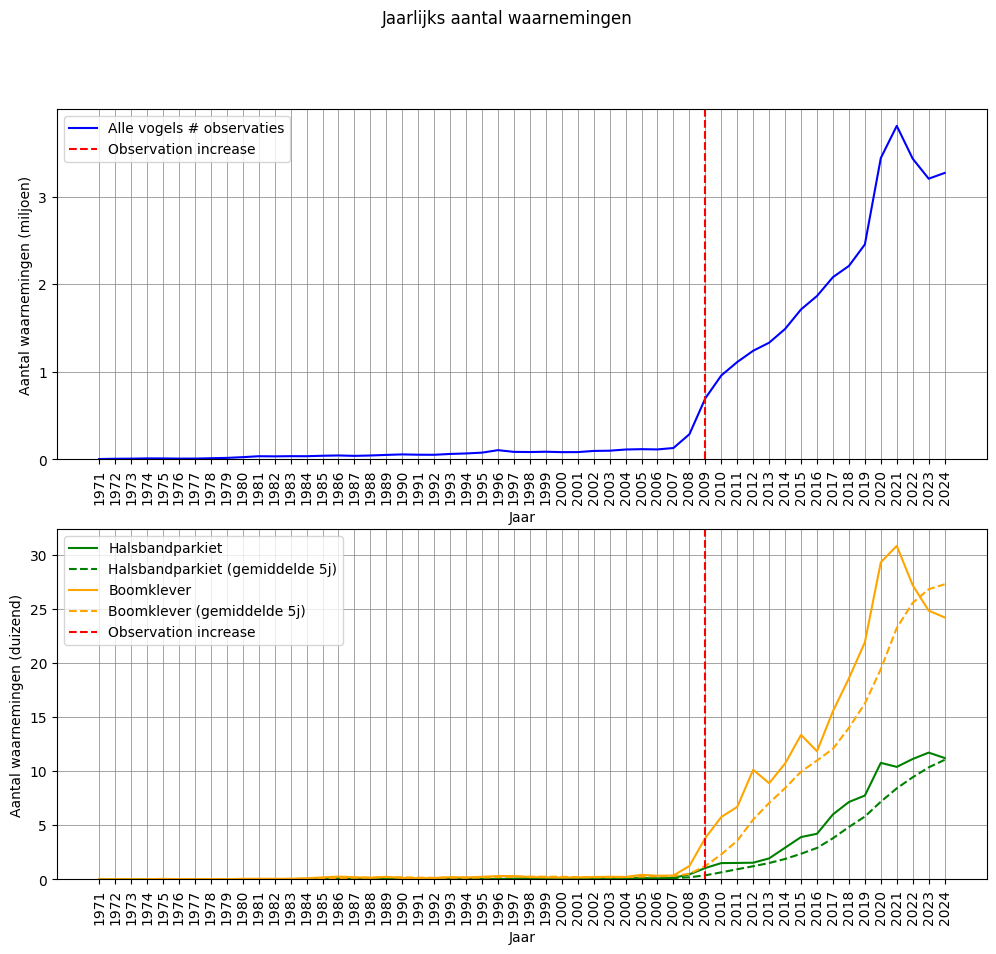

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12, 10))
title = 'Jaarlijks aantal waarnemingen'
fig.suptitle(title)

x = df_yearly.index
all_birds = df_yearly['allbirds_observation_count'].values/1_000_000
hp = df_yearly['observation_count_hp'].values/1_000
hp_mean = df_yearly['observation_count_hp'].rolling(window=5).mean().values/1_000
bk = df_yearly['observation_count_bk'].values/1_000
bk_mean = df_yearly['observation_count_bk'].rolling(window=5).mean().values/1_000

# Plot data
ax1.plot(x, all_birds, label='Alle vogels # observaties', color='blue')

ax2.plot(x, hp, label='Halsbandparkiet', color='green')
ax2.plot(x, hp_mean, linestyle='--', label='Halsbandparkiet (gemiddelde 5j)', color='green')
ax2.plot(x, bk, label='Boomklever', color='orange')
ax2.plot(x, bk_mean, linestyle='--', label='Boomklever (gemiddelde 5j)', color='orange')

# Legende
ax1.legend()
ax2.legend()

# X-as instellingen
ax1.set_xticks(x)
ax1.set_xticklabels(x, rotation=90)
ax1.set_xlabel('Jaar')
ax2.set_xticks(x)
ax2.set_xticklabels(x, rotation=90)
ax2.set_xlabel('Jaar')

# Y-as
y1_max = all_birds.max()
y1_ticks = list(range(0, int(y1_max) + 1))
ax1.set_yticks(y1_ticks)
ax1.set_ylim(bottom=0)
ax1.set_ylabel('Aantal waarnemingen (miljoen)') 

y2_max = max(hp.max(), bk.max())
y2_ticks = list(range(0, int(y2_max) + 1, 5))
ax2.set_yticks(y2_ticks)
ax2.set_ylim(bottom=0)
ax2.set_ylabel('Aantal waarnemingen (duizend)')

# grid
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
# ax1.grid(which='minor', linestyle='-', linewidth='0.2', color='grey') TODO
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='grey')

# Verticale lijn en legenda
ax1.axvline(2009, linestyle='--', color='red', label='Observation increase')
ax1.legend()
ax2.axvline(2009, linestyle='--', color='red', label='Observation increase')
ax2.legend() 

plt.savefig(f'plots/{title}.png')
plt.show()


## Aandeel in jaarlijkse waarnemingen

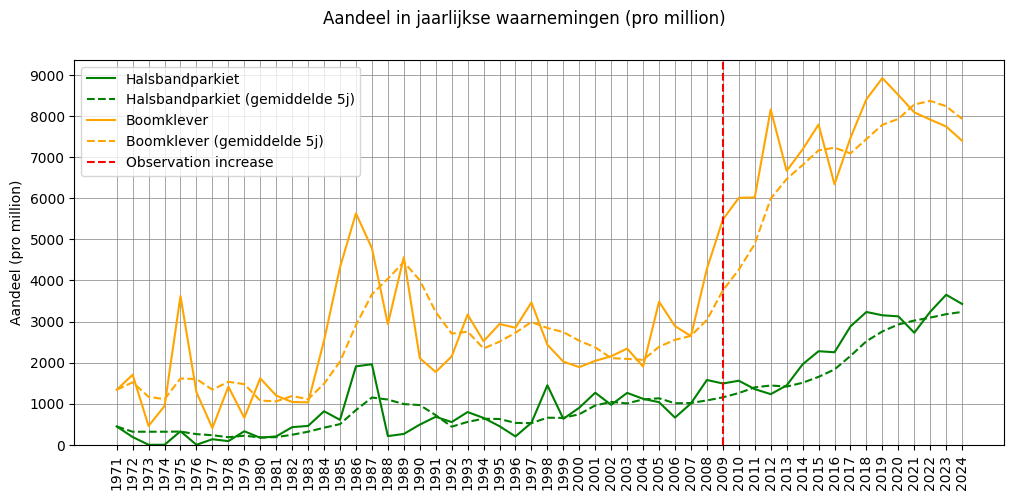

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
title = 'Aandeel in jaarlijkse waarnemingen (pro million)'
fig.suptitle(title)

x = df_yearly.index
hp_pym = df_yearly['observations_pym_hp'].values
hp_pym_5yr_av = df_yearly['observations_pym_5yr_avg_hp'].values
bk_pym = df_yearly['observations_pym_bk'].values
bk_pym_5yr_av = df_yearly['observations_pym_5yr_avg_bk'].values

# Plot data
ax.plot(x, hp_pym, label='Halsbandparkiet', color='green')
ax.plot(x, hp_pym_5yr_av, linestyle='--', label='Halsbandparkiet (gemiddelde 5j)', color='green')
ax.plot(x, bk_pym, label='Boomklever', color='orange')
ax.plot(x, bk_pym_5yr_av, linestyle='--', label='Boomklever (gemiddelde 5j)', color='orange')

# Legende
ax.legend()

# X-as instellingen
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=90)

# Y-as
y_max = max(hp_pym.max(), bk_pym.max())
y_ticks = list(range(0, int(y_max) + 1000, 1000))
ax.set_yticks(y_ticks)
ax.set_ylim(bottom=0)
ax.set_ylabel('Aandeel (pro million)')

# grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
# ax1.grid(which='minor', linestyle='-', linewidth='0.2', color='grey') TODO

# Verticale lijn en legenda
ax.axvline(2009, linestyle='--', color='red', label='Observation increase')
ax.legend()

plt.savefig(f'plots/{title}.png')
plt.show()

## De groei

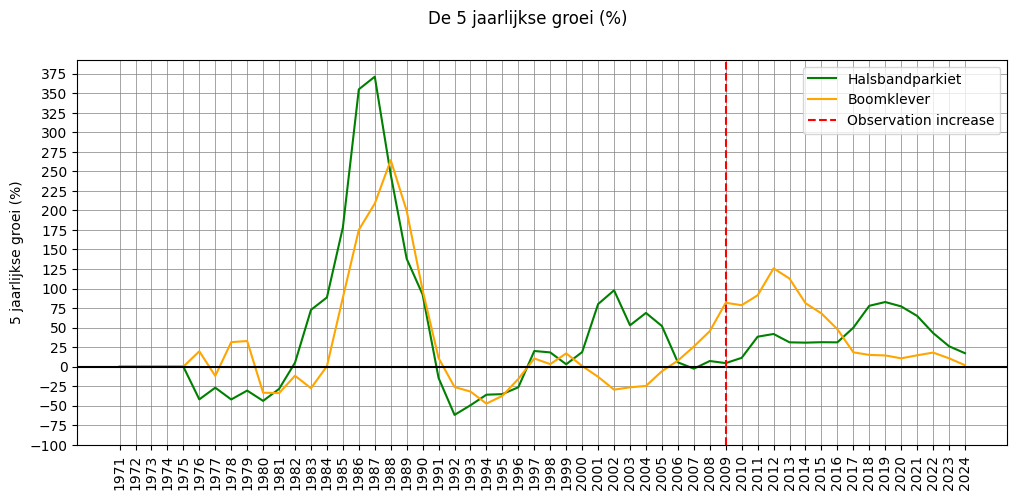

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))
title = 'De 5 jaarlijkse groei (%)'
fig.suptitle(title)


x = df_yearly.index
hp_growth = df_yearly['observations_growth_5yr_%_hp'].values
bk_growth = df_yearly['observations_growth_5yr_%_bk'].values

# Plot data
ax.plot(x, hp_growth, label='Halsbandparkiet', color='green')
ax.plot(x, bk_growth, label='Boomklever', color='orange')

# Legende
ax.legend()

# X-as instellingen
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=90)

# Y-as
y_max = max(hp_growth.max(), bk_growth.max())
y_min = min(hp_growth.min(), bk_growth.min())
y_ticks = list(range(int(y_min - 25 -(y_min%25)), int(y_max) + 25, 25))
ax.set_yticks(y_ticks)
ax.set_ylabel('5 jaarlijkse groei (%)')
# ax.spines['bottom'].set_position('zero') 

# grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
# ax1.grid(which='minor', linestyle='-', linewidth='0.2', color='grey') TODO

# Verticale lijn en legenda
ax.axhline(0, color='black')
ax.axvline(2009, linestyle='--', color='red', label='Observation increase')
ax.legend()

plt.savefig(f'plots/{title}.png')
plt.show()